https://pyimagesearch.com/2024/08/12/how-to-use-tf-gradienttape/

Using model.fit() for training

2025-09-23 21:20:48.925078: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


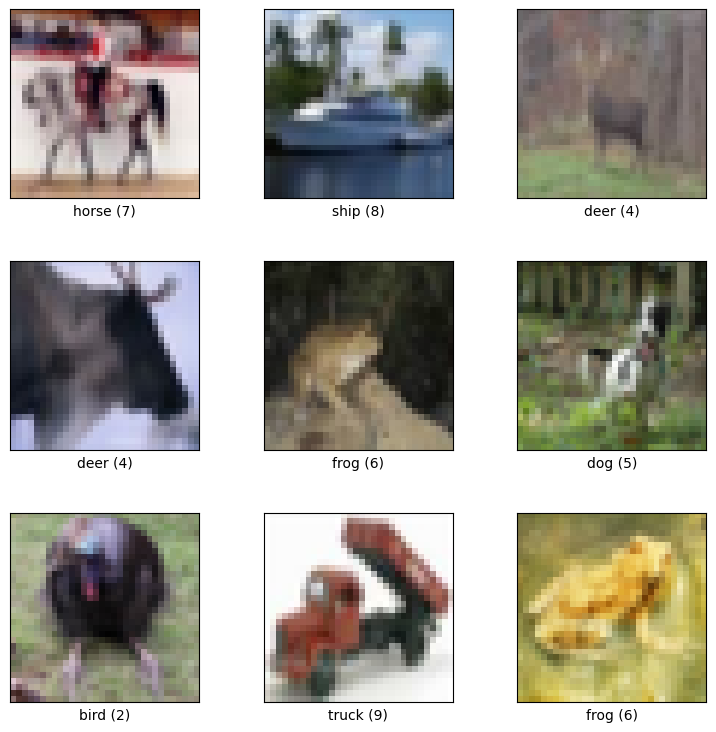

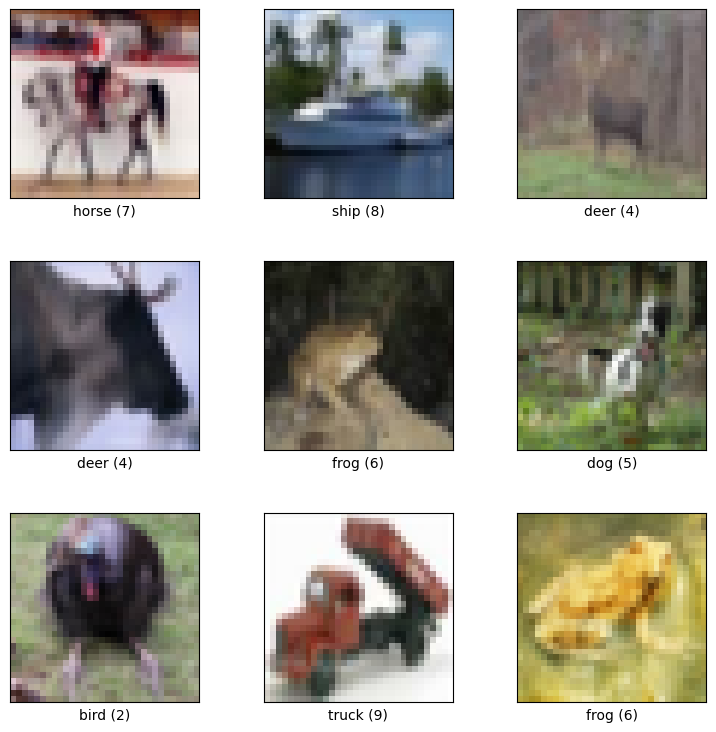

In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds
# Load the CIFAR-10 dataset
(ds_train, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
tfds.show_examples(ds_train, ds_info)

In [7]:
# Normalize the images
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label
ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache().shuffle(ds_info.splits['train'].num_examples).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(32).cache().prefetch(tf.data.experimental.AUTOTUNE)

In [11]:
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes for CIFAR-10
])
model.summary()
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [9]:
model.fit(ds_train, epochs=5, validation_data=ds_test)

Epoch 1/5
1563/1563 [==============================] - 18s 10ms/step - loss: 1.5536 - accuracy: 0.4290 - val_loss: 1.3737 - val_accuracy: 0.5053
Epoch 2/5
1563/1563 [==============================] - 15s 9ms/step - loss: 1.2002 - accuracy: 0.5716 - val_loss: 1.1362 - val_accuracy: 0.5972
Epoch 3/5
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0606 - accuracy: 0.6256 - val_loss: 1.0281 - val_accuracy: 0.6395
Epoch 4/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9615 - accuracy: 0.6603 - val_loss: 0.9513 - val_accuracy: 0.6679
Epoch 5/5
1563/1563 [==============================] - 15s 9ms/step - loss: 0.8914 - accuracy: 0.6856 - val_loss: 0.9380 - val_accuracy: 0.6774
